# Project HR

Predict attrition of your valuable employees

[IBM HR Analytics Employee Attrition & Performance](https://www.kaggle.com/pavansubhasht/ibm-hr-analytics-attrition-dataset)

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
df = pd.read_csv("WA_Fn_UseC_HR_Employee_Attrition.csv")
df.head()

,Age,Attrition,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EmployeeCount,EmployeeNumber,...,RelationshipSatisfaction,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
0,41,Yes,Travel_Rarely,1102,Sales,1,2,Life Sciences,1,1,...,1,80,0,8,0,1,6,4,0,5
1,49,No,Travel_Frequently,279,Research & Development,8,1,Life Sciences,1,2,...,4,80,1,10,3,3,10,7,1,7
2,37,Yes,Travel_Rarely,1373,Research & Development,2,2,Other,1,4,...,2,80,0,7,3,3,0,0,0,0
3,33,No,Travel_Frequently,1392,Research & Development,3,4,Life Sciences,1,5,...,3,80,0,8,3,3,8,7,3,0
4,27,No,Travel_Rarely,591,Research & Development,2,1,Medical,1,7,...,4,80,1,6,3,3,2,2,2,2


In [3]:
df.shape

(1470, 35)

In [4]:
df.pop('EmployeeNumber')
df.pop('Over18')
df.pop('StandardHours')
df.pop('EmployeeCount')

0       1
1       1
2       1
3       1
4       1
       ..
1465    1
1466    1
1467    1
1468    1
1469    1
Name: EmployeeCount, Length: 1470, dtype: int64

In [5]:
df.columns

Index(['Age', 'Attrition', 'BusinessTravel', 'DailyRate', 'Department',
       'DistanceFromHome', 'Education', 'EducationField',
       'EnvironmentSatisfaction', 'Gender', 'HourlyRate', 'JobInvolvement',
       'JobLevel', 'JobRole', 'JobSatisfaction', 'MaritalStatus',
       'MonthlyIncome', 'MonthlyRate', 'NumCompaniesWorked', 'OverTime',
       'PercentSalaryHike', 'PerformanceRating', 'RelationshipSatisfaction',
       'StockOptionLevel', 'TotalWorkingYears', 'TrainingTimesLastYear',
       'WorkLifeBalance', 'YearsAtCompany', 'YearsInCurrentRole',
       'YearsSinceLastPromotion', 'YearsWithCurrManager'],
      dtype='object')

In [6]:
df.shape

(1470, 31)

In [7]:
df.head()

,Age,Attrition,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EnvironmentSatisfaction,Gender,...,PerformanceRating,RelationshipSatisfaction,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
0,41,Yes,Travel_Rarely,1102,Sales,1,2,Life Sciences,2,Female,...,3,1,0,8,0,1,6,4,0,5
1,49,No,Travel_Frequently,279,Research & Development,8,1,Life Sciences,3,Male,...,4,4,1,10,3,3,10,7,1,7
2,37,Yes,Travel_Rarely,1373,Research & Development,2,2,Other,4,Male,...,3,2,0,7,3,3,0,0,0,0
3,33,No,Travel_Frequently,1392,Research & Development,3,4,Life Sciences,4,Female,...,3,3,0,8,3,3,8,7,3,0
4,27,No,Travel_Rarely,591,Research & Development,2,1,Medical,1,Male,...,3,4,1,6,3,3,2,2,2,2


In [8]:
y = df['Attrition']
tmp = df['Attrition']
X = df
X.pop('Attrition')

0       Yes
1        No
2       Yes
3        No
4        No
       ... 
1465     No
1466     No
1467     No
1468     No
1469     No
Name: Attrition, Length: 1470, dtype: object

In [9]:
y.unique()

array(['Yes', 'No'], dtype=object)

In [10]:
df.head()

,Age,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EnvironmentSatisfaction,Gender,HourlyRate,...,PerformanceRating,RelationshipSatisfaction,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
0,41,Travel_Rarely,1102,Sales,1,2,Life Sciences,2,Female,94,...,3,1,0,8,0,1,6,4,0,5
1,49,Travel_Frequently,279,Research & Development,8,1,Life Sciences,3,Male,61,...,4,4,1,10,3,3,10,7,1,7
2,37,Travel_Rarely,1373,Research & Development,2,2,Other,4,Male,92,...,3,2,0,7,3,3,0,0,0,0
3,33,Travel_Frequently,1392,Research & Development,3,4,Life Sciences,4,Female,56,...,3,3,0,8,3,3,8,7,3,0
4,27,Travel_Rarely,591,Research & Development,2,1,Medical,1,Male,40,...,3,4,1,6,3,3,2,2,2,2


In [11]:
from sklearn import preprocessing
le = preprocessing.LabelBinarizer()

In [12]:
y = le.fit_transform(y)

In [13]:
y.shape

(1470, 1)

In [14]:
tmp = le.fit_transform(tmp)

In [15]:
type(tmp)

numpy.ndarray

In [16]:
tmp = pd.Series(list(tmp))

In [17]:
tmp.value_counts()

TypeError: unhashable type: 'numpy.ndarray'

Exception ignored in: 'pandas._libs.index.IndexEngine._call_map_locations'
Traceback (most recent call last):
  File "pandas\_libs\hashtable_class_helper.pxi", line 5231, in pandas._libs.hashtable.PyObjectHashTable.map_locations
TypeError: unhashable type: 'numpy.ndarray'


[0]    1233
[1]     237
dtype: int64

In [18]:
tmp.value_counts() / tmp.count()

TypeError: unhashable type: 'numpy.ndarray'

Exception ignored in: 'pandas._libs.index.IndexEngine._call_map_locations'
Traceback (most recent call last):
  File "pandas\_libs\hashtable_class_helper.pxi", line 5231, in pandas._libs.hashtable.PyObjectHashTable.map_locations
TypeError: unhashable type: 'numpy.ndarray'


[0]    0.838776
[1]    0.161224
dtype: float64

In [19]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1470 entries, 0 to 1469
Data columns (total 30 columns):
 #   Column                    Non-Null Count  Dtype 
---  ------                    --------------  ----- 
 0   Age                       1470 non-null   int64 
 1   BusinessTravel            1470 non-null   object
 2   DailyRate                 1470 non-null   int64 
 3   Department                1470 non-null   object
 4   DistanceFromHome          1470 non-null   int64 
 5   Education                 1470 non-null   int64 
 6   EducationField            1470 non-null   object
 7   EnvironmentSatisfaction   1470 non-null   int64 
 8   Gender                    1470 non-null   object
 9   HourlyRate                1470 non-null   int64 
 10  JobInvolvement            1470 non-null   int64 
 11  JobLevel                  1470 non-null   int64 
 12  JobRole                   1470 non-null   object
 13  JobSatisfaction           1470 non-null   int64 
 14  MaritalStatus           

In [20]:
df.select_dtypes(['object'])

,BusinessTravel,Department,EducationField,Gender,JobRole,MaritalStatus,OverTime
0,Travel_Rarely,Sales,Life Sciences,Female,Sales Executive,Single,Yes
1,Travel_Frequently,Research & Development,Life Sciences,Male,Research Scientist,Married,No
2,Travel_Rarely,Research & Development,Other,Male,Laboratory Technician,Single,Yes
3,Travel_Frequently,Research & Development,Life Sciences,Female,Research Scientist,Married,Yes
4,Travel_Rarely,Research & Development,Medical,Male,Laboratory Technician,Married,No
...,...,...,...,...,...,...,...
1465,Travel_Frequently,Research & Development,Medical,Male,Laboratory Technician,Married,No
1466,Travel_Rarely,Research & Development,Medical,Male,Healthcare Representative,Married,No
1467,Travel_Rarely,Research & Development,Life Sciences,Male,Manufacturing Director,Married,Yes
1468,Travel_Frequently,Sales,Medical,Male,Sales Executive,Married,No


In [21]:
ind_BusinessTravel = pd.get_dummies(df['BusinessTravel'], prefix='BusinessTravel')
ind_Department = pd.get_dummies(df['Department'], prefix='Department')
ind_EducationField = pd.get_dummies(df['EducationField'], prefix='EducationField')
ind_Gender = pd.get_dummies(df['Gender'], prefix='Gender')
ind_JobRole = pd.get_dummies(df['JobRole'], prefix='JobRole')
ind_MaritalStatus = pd.get_dummies(df['MaritalStatus'], prefix='MaritalStatus')
ind_OverTime = pd.get_dummies(df['OverTime'], prefix='OverTime')

In [22]:
ind_BusinessTravel.head()

,BusinessTravel_Non-Travel,BusinessTravel_Travel_Frequently,BusinessTravel_Travel_Rarely
0,0,0,1
1,0,1,0
2,0,0,1
3,0,1,0
4,0,0,1


In [23]:
df['BusinessTravel'].unique()

array(['Travel_Rarely', 'Travel_Frequently', 'Non-Travel'], dtype=object)

In [24]:
df1 = pd.concat([ind_BusinessTravel, ind_Department, ind_EducationField, ind_Gender, 
                 ind_JobRole, ind_MaritalStatus, ind_OverTime])

In [25]:
df.select_dtypes(['int64'])

,Age,DailyRate,DistanceFromHome,Education,EnvironmentSatisfaction,HourlyRate,JobInvolvement,JobLevel,JobSatisfaction,MonthlyIncome,...,PerformanceRating,RelationshipSatisfaction,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
0,41,1102,1,2,2,94,3,2,4,5993,...,3,1,0,8,0,1,6,4,0,5
1,49,279,8,1,3,61,2,2,2,5130,...,4,4,1,10,3,3,10,7,1,7
2,37,1373,2,2,4,92,2,1,3,2090,...,3,2,0,7,3,3,0,0,0,0
3,33,1392,3,4,4,56,3,1,3,2909,...,3,3,0,8,3,3,8,7,3,0
4,27,591,2,1,1,40,3,1,2,3468,...,3,4,1,6,3,3,2,2,2,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1465,36,884,23,2,3,41,4,2,4,2571,...,3,3,1,17,3,3,5,2,0,3
1466,39,613,6,1,4,42,2,3,1,9991,...,3,1,1,9,5,3,7,7,1,7
1467,27,155,4,3,2,87,4,2,2,6142,...,4,2,1,6,0,3,6,2,0,3
1468,49,1023,2,3,4,63,2,2,2,5390,...,3,4,0,17,3,2,9,6,0,8


In [26]:
df1 = pd.concat([ind_BusinessTravel, ind_Department, ind_EducationField, ind_Gender, 
                 ind_JobRole, ind_MaritalStatus, ind_OverTime, df.select_dtypes(['int64'])], axis=1)

In [27]:
df1.shape

(1470, 51)

# Decision Tree

In [28]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(df1, y)

In [29]:
from sklearn.tree import DecisionTreeClassifier

In [30]:
clf = DecisionTreeClassifier(random_state=42)

In [31]:
clf.fit(X_train, y_train)

DecisionTreeClassifier(random_state=42)

In [32]:
from sklearn.model_selection import cross_val_score, cross_val_predict
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

In [33]:
def print_score(clf, X_train, y_train, X_test, y_test, train=True):
    '''
    print the accuracy score, classification report and confusion matrix of classifier
    '''
    if train:
        '''
        training performance
        '''
        print("Train Result:\n")
        print("accuracy score: {0:.4f}\n".format(accuracy_score(y_train, clf.predict(X_train))))
        print("Classification Report: \n {}\n".format(classification_report(y_train, clf.predict(X_train))))
        print("Confusion Matrix: \n {}\n".format(confusion_matrix(y_train, clf.predict(X_train))))

        res = cross_val_score(clf, X_train, y_train.ravel(), cv=10, scoring='accuracy')
        print("Average Accuracy: \t {0:.4f}".format(np.mean(res)))
        print("Accuracy SD: \t\t {0:.4f}".format(np.std(res)))
        
    elif train==False:
        '''
        test performance
        '''
        print("Test Result:\n")        
        print("accuracy score: {0:.4f}\n".format(accuracy_score(y_test, clf.predict(X_test))))
        print("Classification Report: \n {}\n".format(classification_report(y_test, clf.predict(X_test))))
        print("Confusion Matrix: \n {}\n".format(confusion_matrix(y_test, clf.predict(X_test))))    
        

In [34]:
print_score(clf, X_train, y_train, X_test, y_test, train=True)

Train Result:

accuracy score: 1.0000

Classification Report: 
               precision    recall  f1-score   support

           0       1.00      1.00      1.00       928
           1       1.00      1.00      1.00       174

    accuracy                           1.00      1102
   macro avg       1.00      1.00      1.00      1102
weighted avg       1.00      1.00      1.00      1102


Confusion Matrix: 
 [[928   0]
 [  0 174]]

Average Accuracy: 	 0.7840
Accuracy SD: 		 0.0286


In [35]:
print_score(clf, X_train, y_train, X_test, y_test, train=False)

Test Result:

accuracy score: 0.7609

Classification Report: 
               precision    recall  f1-score   support

           0       0.86      0.86      0.86       305
           1       0.30      0.30      0.30        63

    accuracy                           0.76       368
   macro avg       0.58      0.58      0.58       368
weighted avg       0.76      0.76      0.76       368


Confusion Matrix: 
 [[261  44]
 [ 44  19]]



The result is clearly not satisfactory. We will revisit this project after we covered ensemble model.

****

# Bagging

In [36]:
from sklearn.ensemble import BaggingClassifier

In [37]:
bag_clf = BaggingClassifier(base_estimator=clf, n_estimators=5000,
                            bootstrap=True, n_jobs=-1, random_state=42)

In [38]:
bag_clf.fit(X_train, y_train.ravel())

BaggingClassifier(base_estimator=DecisionTreeClassifier(random_state=42),
                  n_estimators=5000, n_jobs=-1, random_state=42)

In [39]:
print_score(bag_clf, X_train, y_train, X_test, y_test, train=True)
print_score(bag_clf, X_train, y_train, X_test, y_test, train=False)

Train Result:

accuracy score: 1.0000

Classification Report: 
               precision    recall  f1-score   support

           0       1.00      1.00      1.00       928
           1       1.00      1.00      1.00       174

    accuracy                           1.00      1102
   macro avg       1.00      1.00      1.00      1102
weighted avg       1.00      1.00      1.00      1102


Confusion Matrix: 
 [[928   0]
 [  0 174]]

Average Accuracy: 	 0.8475
Accuracy SD: 		 0.0310
Test Result:

accuracy score: 0.8668

Classification Report: 
               precision    recall  f1-score   support

           0       0.87      0.99      0.92       305
           1       0.82      0.29      0.42        63

    accuracy                           0.87       368
   macro avg       0.84      0.64      0.67       368
weighted avg       0.86      0.87      0.84       368


Confusion Matrix: 
 [[301   4]
 [ 45  18]]



***

# Random Forest

In [40]:
from sklearn.ensemble import RandomForestClassifier

In [41]:
rf_clf = RandomForestClassifier()

In [42]:
rf_clf.fit(X_train, y_train.ravel())

RandomForestClassifier()

In [43]:
print_score(rf_clf, X_train, y_train, X_test, y_test, train=True)
print_score(rf_clf, X_train, y_train, X_test, y_test, train=False)

Train Result:

accuracy score: 1.0000

Classification Report: 
               precision    recall  f1-score   support

           0       1.00      1.00      1.00       928
           1       1.00      1.00      1.00       174

    accuracy                           1.00      1102
   macro avg       1.00      1.00      1.00      1102
weighted avg       1.00      1.00      1.00      1102


Confusion Matrix: 
 [[928   0]
 [  0 174]]

Average Accuracy: 	 0.8593
Accuracy SD: 		 0.0169
Test Result:

accuracy score: 0.8668

Classification Report: 
               precision    recall  f1-score   support

           0       0.87      0.99      0.92       305
           1       0.85      0.27      0.41        63

    accuracy                           0.87       368
   macro avg       0.86      0.63      0.67       368
weighted avg       0.86      0.87      0.84       368


Confusion Matrix: 
 [[302   3]
 [ 46  17]]



In [44]:
import seaborn as sns

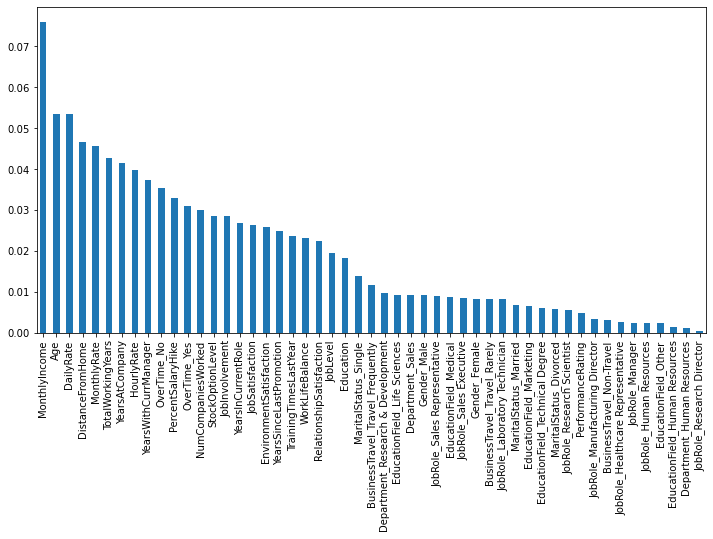

In [45]:
pd.Series(rf_clf.feature_importances_, 
         index=X_train.columns).sort_values(ascending=False).plot(kind='bar', figsize=(12,6));

# AdaBoost

In [46]:
from sklearn.ensemble import AdaBoostClassifier

In [47]:
ada_clf = AdaBoostClassifier()

In [48]:
ada_clf.fit(X_train, y_train.ravel())

AdaBoostClassifier()

In [49]:
print_score(ada_clf, X_train, y_train, X_test, y_test, train=True)
print_score(ada_clf, X_train, y_train, X_test, y_test, train=False)

Train Result:

accuracy score: 0.9029

Classification Report: 
               precision    recall  f1-score   support

           0       0.91      0.98      0.94       928
           1       0.83      0.49      0.61       174

    accuracy                           0.90      1102
   macro avg       0.87      0.73      0.78      1102
weighted avg       0.90      0.90      0.89      1102


Confusion Matrix: 
 [[910  18]
 [ 89  85]]

Average Accuracy: 	 0.8639
Accuracy SD: 		 0.0196
Test Result:

accuracy score: 0.8587

Classification Report: 
               precision    recall  f1-score   support

           0       0.88      0.96      0.92       305
           1       0.67      0.35      0.46        63

    accuracy                           0.86       368
   macro avg       0.77      0.66      0.69       368
weighted avg       0.84      0.86      0.84       368


Confusion Matrix: 
 [[294  11]
 [ 41  22]]



***

# AdaBoost + RandomForest

In [50]:
ada_clf = AdaBoostClassifier(RandomForestClassifier())
ada_clf.fit(X_train, y_train.ravel())

AdaBoostClassifier(base_estimator=RandomForestClassifier())

In [51]:
print_score(ada_clf, X_train, y_train, X_test, y_test, train=True)
print_score(ada_clf, X_train, y_train, X_test, y_test, train=False)

Train Result:

accuracy score: 1.0000

Classification Report: 
               precision    recall  f1-score   support

           0       1.00      1.00      1.00       928
           1       1.00      1.00      1.00       174

    accuracy                           1.00      1102
   macro avg       1.00      1.00      1.00      1102
weighted avg       1.00      1.00      1.00      1102


Confusion Matrix: 
 [[928   0]
 [  0 174]]

Average Accuracy: 	 0.8584
Accuracy SD: 		 0.0212
Test Result:

accuracy score: 0.8533

Classification Report: 
               precision    recall  f1-score   support

           0       0.86      0.99      0.92       305
           1       0.76      0.21      0.32        63

    accuracy                           0.85       368
   macro avg       0.81      0.60      0.62       368
weighted avg       0.84      0.85      0.82       368


Confusion Matrix: 
 [[301   4]
 [ 50  13]]



***

# Gradient Boosting Classifier

In [52]:
from sklearn.ensemble import GradientBoostingClassifier

In [53]:
gbc_clf = GradientBoostingClassifier()
gbc_clf.fit(X_train, y_train.ravel())

GradientBoostingClassifier()

In [54]:
print_score(gbc_clf, X_train, y_train, X_test, y_test, train=True)
print_score(gbc_clf, X_train, y_train, X_test, y_test, train=False)

Train Result:

accuracy score: 0.9637

Classification Report: 
               precision    recall  f1-score   support

           0       0.96      1.00      0.98       928
           1       0.98      0.79      0.87       174

    accuracy                           0.96      1102
   macro avg       0.97      0.89      0.93      1102
weighted avg       0.96      0.96      0.96      1102


Confusion Matrix: 
 [[925   3]
 [ 37 137]]

Average Accuracy: 	 0.8566
Accuracy SD: 		 0.0199
Test Result:

accuracy score: 0.8560

Classification Report: 
               precision    recall  f1-score   support

           0       0.86      0.98      0.92       305
           1       0.75      0.24      0.36        63

    accuracy                           0.86       368
   macro avg       0.81      0.61      0.64       368
weighted avg       0.84      0.86      0.82       368


Confusion Matrix: 
 [[300   5]
 [ 48  15]]



***

# XGBoost

In [55]:
import xgboost as xgb

In [56]:
xgb_clf = xgb.XGBClassifier()
xgb_clf.fit(X_train, y_train.ravel())

C:\ProgramData\Anaconda3\lib\site-packages\xgboost\sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[15:40:45] WARNING: ..\src\learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=1, enable_categorical=False,
              gamma=0, gpu_id=-1, importance_type=None,
              interaction_constraints='', learning_rate=0.300000012,
              max_delta_step=0, max_depth=6, min_child_weight=1, missing=nan,
              monotone_constraints='()', n_estimators=100, n_jobs=4,
              num_parallel_tree=1, predictor='auto', random_state=0,
              reg_alpha=0, reg_lambda=1, scale_pos_weight=1, subsample=1,
              tree_method='exact', validate_parameters=1, verbosity=None)

In [58]:
print_score(xgb_clf, X_train, y_train, X_test, y_test, train=True)
print_score(xgb_clf, X_train, y_train, X_test, y_test, train=False)

Train Result:

accuracy score: 1.0000

Classification Report: 
               precision    recall  f1-score   support

           0       1.00      1.00      1.00       928
           1       1.00      1.00      1.00       174

    accuracy                           1.00      1102
   macro avg       1.00      1.00      1.00      1102
weighted avg       1.00      1.00      1.00      1102


Confusion Matrix: 
 [[928   0]
 [  0 174]]



C:\ProgramData\Anaconda3\lib\site-packages\xgboost\sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[18:50:04] WARNING: ..\src\learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


C:\ProgramData\Anaconda3\lib\site-packages\xgboost\sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[18:50:04] WARNING: ..\src\learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


C:\ProgramData\Anaconda3\lib\site-packages\xgboost\sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[18:50:05] WARNING: ..\src\learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


C:\ProgramData\Anaconda3\lib\site-packages\xgboost\sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[18:50:05] WARNING: ..\src\learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


C:\ProgramData\Anaconda3\lib\site-packages\xgboost\sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[18:50:06] WARNING: ..\src\learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


C:\ProgramData\Anaconda3\lib\site-packages\xgboost\sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[18:50:06] WARNING: ..\src\learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


C:\ProgramData\Anaconda3\lib\site-packages\xgboost\sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[18:50:07] WARNING: ..\src\learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


C:\ProgramData\Anaconda3\lib\site-packages\xgboost\sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[18:50:07] WARNING: ..\src\learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


C:\ProgramData\Anaconda3\lib\site-packages\xgboost\sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[18:50:08] WARNING: ..\src\learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


C:\ProgramData\Anaconda3\lib\site-packages\xgboost\sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[18:50:09] WARNING: ..\src\learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
Average Accuracy: 	 0.8602
Accuracy SD: 		 0.0222
Test Result:

accuracy score: 0.8641

Classification Report: 
               precision    recall  f1-score   support

           0       0.87      0.99      0.92       305
           1       0.81      0.27      0.40        63

    accuracy                           0.86       368
   macro avg       0.84      0.63      0.66       368
weighted avg       0.86      0.86      0.83       368


Confusion Matrix: 
 [[301   4]
 [ 46  17]]



***